<center>
<img src="https://i.ibb.co/Ycs11Fg/meme.jpg">
</center>

# Андан на экономе: домашнее задание 3
## Задача классификации

**ФИО:** Ягжов Иван Алексеевич


## Общая информация


__Дата выдачи:__ 14.04.2023

__Мягкий дедлайн:__ 23:59MSK 07.05.2023

__Жесткий дедлайн:__ 23:59MSK 14.05.2023

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 100 баллов. За каждый день просрочки после мягкого дедлайна снимается 10 баллов. После жёсткого дедлайна работы не принимаются. Даже при опозданиии на одну секунду. Сдавайте работы заранее.

Мягкий дедлайн можно отодвинуть без потери баллов на 1,2 или 3 дня. Суммарно для откладывания в запасе есть три дня. Можно отодвинуть один дедлайн на три дня, а можно три дедлайна подвинуть на один день. Распоряжаться этими днями студент может как угодно. Жёсткий дедлайн, при этом, не меняется. Если такое произошло, нужно сообщить о сдвиге при сдаче работы.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Любой из студентов может быть вызван на защиту любого домашнего задания. В таком случае итоговая оценка студента определяется в результате защиты.

> За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено. 

> Выводы должны быть релевантными. Не забывайте их писать. Если в вопросе требуется ответ словами, а его нет, вы будете терять довольно много баллов.

> Фиксируйте все seed'ы, random_state'ы и тд - ваш код должен быть воспроизводим с теми же результатами.

## Формат сдачи

Сам ноутбук называйте в формате hw-03-USERNAME.ipynb, где USERNAME — ваши фамилия и имя. Файл сдаётся в anytask.

## Импорт необходимых библиотек 

Импортируйте все используемые библиотеки здесь.

In [3]:
# Ваш код здесь
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# Отключение некоторых лишних предупреждений
import warnings
warnings.filterwarnings("ignore")

## Задача 

В данном задании вам необходимо построить предсказательную модель, определяющую пол клиента по его банковским транзакциям.

Вам доступны 2 файла:
* __transaction.csv__ - файл с транзакциями, колонки:
    * user_id - целочисленный идентификатор пользователя
    * dt - дата и время совершения транзации, принцип кодирования: "DAY TIME"
        * DAY - порядковый день транзации с начала сбора данных
        * TIME - время в формате hh:mm:ss
    * type - тип (категория) совершаемой транзакции
    * value - сумма транзакции
    
* __gender.csv__ - файл с данными о полах клиентов.
    * user_id - целочисленный идентификатор пользователя
    * gender - целевая переменная, закодированная лейблами 0 и 1. Это сделано:
        * a) для удобства
        * б) для избежания холиваров о правильности исходных меток 

Но если вы вдруг захотите похоливарить о том, что метки только две - то заметьте, что о полноте данных мы тоже не утверждаем.

# Часть 1: минималочка [макс 20 баллов]

В этой части мы с вами попробуем построить самую простую модель для предсказания.

Как мы с вами увидим: главная сложность - правильная подготовка данных. В таких задачах то, как именно вы преобразуете данные для обучения модели и будет во много определять её качество.

В этой части мы сделаем простое преобразование данных путём простой агрегации данных о величине транзакций. 

## Загрузка данных [5 баллов] 

Скачайте данные для задачи с Яндекс.Диска:
https://disk.yandex.ru/d/DGy6bbLaMZmrQg.

Загрузите файлы с транзакциями и целевой меткой в pd.DataFrame.

__Внимание__: у файла transactions.csv колоночный разделитель - точка с запятой ";"

In [4]:
# Загрузим файл с транзакциями и посмотрим на них
df_trans = pd.read_csv('transactions.csv', delimiter=';')
print(df_trans.shape)
df_trans.head()

(2282467, 4)


,user_id,dt,type,value
0,39026145,0 10:23:26,"Звонки с использованием телефонов, считывающих...",2695.099
1,39026145,6 07:08:31,"Звонки с использованием телефонов, считывающих...",2358.212
2,39026145,8 07:06:10,"Звонки с использованием телефонов, считывающих...",2807.395
3,39026145,11 08:49:03,"Звонки с использованием телефонов, считывающих...",2695.099
4,39026145,11 14:12:08,"Звонки с использованием телефонов, считывающих...",2695.099


In [5]:
# Загрузим файл с гендерами и посмотрим на них
df_gen = pd.read_csv('gender.csv', delimiter=',')
print(df_gen.shape)
df_gen.head()

(8400, 2)


,user_id,gender
0,6740969,1.0
1,36599781,0.0
2,91453656,1.0
3,17431962,1.0
4,72568668,1.0


## Подготовка данных [10 баллов] 

Для данной задачи необходимо как-то собрать данные для каждого пользователя в один вектор (строку таблицы). Сейчас, как вы можете увидеть, в таблице с данными одному пользователю может соответствовать много строк (каждая операция - отдельная строка).

Таким образом, необходима агрегация данных - это можно сделать множеством разных способов.

### Агрегация 

Произведите простую агрегацию данных и для каждого пользователя в качестве признаков получите сумму, среднее и стандартное отклонение величины его транзакций. 

Так же добавите для каждого пользователя колонку с таргетом.

По итогу вы должны получить таблицу с колонками:
* user_id
* value_sum
* value_mean
* value_std
* gender

In [6]:
df_agr = pd.DataFrame(df_trans.drop(columns=['dt', 'type']))
df_agregation = pd.DataFrame()
df_agregation['value_sum']= df_agr.groupby('user_id').sum()
df_agregation['value_mean']= df_agr.groupby('user_id').mean()
df_agregation['value_std']= df_agr.groupby('user_id').std()
df_agregation = df_agregation.merge(df_gen, how = 'left', on = ['user_id'])
df_agregation #полный список пользователей

,user_id,value_sum,value_mean,value_std,gender
0,22899,274383.315,2143.619648,656.186785,1.0
1,27914,166436.523,2521.765500,415.972053,1.0
2,28753,251578.185,1980.930591,749.304999,0.0
3,31385,717856.052,2323.158744,632.491585,0.0
4,38084,1360028.958,2095.576206,649.030870,0.0
...,...,...,...,...,...
8351,99953525,159252.786,1608.614000,709.903466,0.0
8352,99967537,13026.313,2605.262600,123.013557,1.0
8353,99988578,1304612.429,2185.280451,638.235664,1.0
8354,99991245,249213.163,2026.123276,739.432221,1.0


In [7]:
# посмотрим на пропуски
df_agregation.isna().sum() 

user_id        0
value_sum      0
value_mean     0
value_std     47
gender         0
dtype: int64

In [8]:
# заполним пропуски в столбце "value_std" медианным значением
df_agregation.fillna(df_agregation['value_std'].median(), inplace = True) 
df_agregation

,user_id,value_sum,value_mean,value_std,gender
0,22899,274383.315,2143.619648,656.186785,1.0
1,27914,166436.523,2521.765500,415.972053,1.0
2,28753,251578.185,1980.930591,749.304999,0.0
3,31385,717856.052,2323.158744,632.491585,0.0
4,38084,1360028.958,2095.576206,649.030870,0.0
...,...,...,...,...,...
8351,99953525,159252.786,1608.614000,709.903466,0.0
8352,99967537,13026.313,2605.262600,123.013557,1.0
8353,99988578,1304612.429,2185.280451,638.235664,1.0
8354,99991245,249213.163,2026.123276,739.432221,1.0


In [9]:
# сделаем 'user_id' индексом таблицы
df_agregation = df_agregation.set_index('user_id')

### Отложенная выборка 

Получите полный список пользователей и разделите их на два списка:
* тренировочный список пользователей (80%)
* тестовый список пользователей (20%)

__Важное замечание__: Далее во всех пунктах, где вам нужно провалидировать (оценить) получившуюся модель исползуйте данные только для этих тестовых пользователей.

Обучать все модели, естественно, нужно только на данных пользователей из обучающего списка.

In [10]:
# делим выборку на обучающую и тестовую
df_train, df_test = train_test_split(df_agregation, test_size = 0.2, random_state = 32)

Для нашей задачи получите признаки и целевые метки обучающей и тестовой выборки. 

In [11]:
# Посмотрим на тестовую выборку
df_test

,value_sum,value_mean,value_std,gender
user_id,,,,
70938867,2864515.099,2521.580193,445.939128,0.0
69907295,1212916.538,1994.928516,672.135103,0.0
21217132,2008102.453,2185.095161,615.192965,1.0
38536207,412160.384,2513.173073,392.076476,1.0
13195994,448484.640,1892.340253,671.941050,0.0
...,...,...,...,...
59545596,992846.680,2196.563451,622.523473,1.0
89210806,362488.382,1562.449922,649.548706,1.0
2787811,629146.400,2589.079835,446.927644,0.0


In [12]:
# Посмотрим на обучающую выборку
df_train

,value_sum,value_mean,value_std,gender
user_id,,,,
20467257,13587.794,1698.474250,901.244168,0.0
65488357,749709.227,2271.846142,588.130096,0.0
51070933,35463.018,2216.438625,681.354317,1.0
51285559,358289.367,2024.233712,682.168534,0.0
49697655,1227710.700,2402.564971,590.509619,0.0
...,...,...,...,...
80435602,444267.769,2414.498745,546.421688,1.0
55221263,874129.319,2270.465764,519.493467,1.0
38134287,298802.702,2352.777181,634.328713,0.0


## Обучение и оценка модели [5 баллов] 

Обучите модель логистической регрессии с дефолтными параметрами.

Получите предсказания вероятностей первого класса.

In [13]:
# Будем предсказывать гендер, ориентируясь на транзакции

y_train = df_train['gender']
y_test = df_test['gender']

X_train = df_train.drop('gender', axis = 1)
X_test = df_test.drop('gender', axis = 1)

# Объявили модель
model_log_regression = LogisticRegression()

# Обучили модель на тренировочной выборке 
model_log_regression.fit(X_train, y_train)

# Сделали прогнозы на тестовой выборке 
y_pred = model_log_regression.predict(X_test)
y_pred_regr = model_log_regression.predict_proba(X_test)

In [14]:
# получим предсказания вероятностей первого класса
y_pred_regr = y_pred_regr [:, 1]

### Валидация 

Посчитайте ROC_AUC, accuracy, precision, recall для получившихся предсказаний.

Для метрик, для которых необходимы метки классов, а не вероятности - используйте порог 0.5.

Далее при оценки других моделей приводите эти же метрики (если явно не указано иное).

In [15]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5478468899521531

In [16]:
# precision & recall
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
t = 0.5
p_pred = 1*(y_pred_regr >= t) 

print('Точность:', precision_score(y_test, p_pred)) # precision
print('Полнота:', recall_score(y_test, p_pred)) # recall

Точность: 0.8260869565217391
Полнота: 0.02464332036316472


In [17]:
# ROC_AUC
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_regr)

0.5320511436349006

### Вывод

Как вы оцениваете качество получившейся модели и возможные причины такого качества?

__Ваш вывод:__

Для начала посмотрим на метрики: Accuracy score = +-0.54, что означает некачественность нашего предсказания. Говоря о precision - тут как будто бы всё неплохо. Recall - полнота около 0 (0.024), это свидетельствует о том, что наш алгоритм в среднем правильно предсказывает правильно около 2-ух объектов из 100, это нам не нравится. ROC-AUC - то он получился примерно равен 0.53, что свидетельствует о том, что модель предсказывает объекты случайно, а это не позволит сделать какой-то логичный вывод. В общем и целом, модель далека от идеала. Скорее всего это связано с тем, что мы рассматриваем только стоимость транзакций, а не их направленности (что исправим во второй части). Для повышения качества нужно расширять рассматриваемые признаки.

# Часть 2: мб сделаем что-то более серьёзное? [макс 20 баллов]

Давайте попробуем улучшить качество решения задачи за счёт другого метода подготовки данных.

Ранее мы использовали простое преобразование, когда каждый клиент описывался только 3 значениями.
Давайте сделаем что-то более сложное и попробуем добавить больше данных о клиенте для модели.

## Подготовка данных [15 баллов]

Воспользуемся тем, что каждая транзакция у нас имеет свой тип - это уж точно более информативно, чем агрегация по всем транзакциям.

Создайте сводную таблицу, где для каждого клиента (строка) будут указаны его суммарные траты на каждую категорию (столбец). Таким образом, вы должны получить таблицу с числом строк равным количеству клиентов и числом столбцов - количеству категорий трат. Каждая ячейка должна содержать суммарные траты данного клиента в данной категории.

__Подсказка__: у DataFrame есть полезный метод `pivot_table`.

In [18]:
df_pivot = pd.pivot_table(df_trans, values = 'value', index = ['user_id'],
                       columns = ['type'], aggfunc = np.sum)

In [19]:
df_pivot = df_pivot.merge(df_gen, how = 'left', on = ['user_id']).set_index('user_id')

# заполняем нулями, потому что у конкретного user не было покупки в данной категории
df_pivot.fillna(value = 0 , inplace = True ) 
df_pivot

,"Авиалинии, авиакомпании","Авиалинии, авиакомпании, нигде более не классифицированные",Автобусные линии,Автозапчасти и аксессуары,Автоматизированные бензозаправки,Автомойки,Автошины,"Агентства по автотранспортным перевозкам, местные/дальные автогрузоперевозки, компании попереезду и хранению, местная доставка",Агентства по аренде автомобилей,Агенты и менеджеры по аренде недвижимости,...,"Химикалии и смежные вещества, не классифицированные ранее",Химчистки,Ценные бумаги: брокеры/дилеры,Центры здоровья,"Цифровые товары, игры",Школы — бизнес и секретарей,Штрафы,"Штучные товары, галантерея и другие текстильные товары",Электрические части и оборудование,gender
user_id,,,,,,,,,,,,,,,,,,,,,
22899,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0
27914,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0
28753,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
31385,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
38084,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99953525,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
99967537,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0
99988578,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4267.24,0.0,0.0,0.0,0.0,1.0


## Обучение и валидация модели [5 баллов]

Аналогично предыдущей части разделите данные на обучающую и тестовую выборку (80%/20%), обучите модель на дефолтных параметрах и оцените качество.

In [20]:
# аналогично предыдущей части разделим данные на обучающую и тестовую выборку
df_train_pivot, df_test_pivot = train_test_split(df_pivot, test_size = 0.2, random_state = 32)

In [21]:
# обучающая выборка
df_train_pivot

,"Авиалинии, авиакомпании","Авиалинии, авиакомпании, нигде более не классифицированные",Автобусные линии,Автозапчасти и аксессуары,Автоматизированные бензозаправки,Автомойки,Автошины,"Агентства по автотранспортным перевозкам, местные/дальные автогрузоперевозки, компании попереезду и хранению, местная доставка",Агентства по аренде автомобилей,Агенты и менеджеры по аренде недвижимости,...,"Химикалии и смежные вещества, не классифицированные ранее",Химчистки,Ценные бумаги: брокеры/дилеры,Центры здоровья,"Цифровые товары, игры",Школы — бизнес и секретарей,Штрафы,"Штучные товары, галантерея и другие текстильные товары",Электрические части и оборудование,gender
user_id,,,,,,,,,,,,,,,,,,,,,
20467257,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0
65488357,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0
51070933,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,1.0
51285559,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,2405.376,0.0,0.0
49697655,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80435602,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,1.0
55221263,0.0,0.0,0.0,12269.217,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,1.0
38134287,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0


In [22]:
# тестовая выборка
df_test_pivot

,"Авиалинии, авиакомпании","Авиалинии, авиакомпании, нигде более не классифицированные",Автобусные линии,Автозапчасти и аксессуары,Автоматизированные бензозаправки,Автомойки,Автошины,"Агентства по автотранспортным перевозкам, местные/дальные автогрузоперевозки, компании попереезду и хранению, местная доставка",Агентства по аренде автомобилей,Агенты и менеджеры по аренде недвижимости,...,"Химикалии и смежные вещества, не классифицированные ранее",Химчистки,Ценные бумаги: брокеры/дилеры,Центры здоровья,"Цифровые товары, игры",Школы — бизнес и секретарей,Штрафы,"Штучные товары, галантерея и другие текстильные товары",Электрические части и оборудование,gender
user_id,,,,,,,,,,,,,,,,,,,,,
70938867,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0
69907295,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0
21217132,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1931.488,0.0,0.0,0.0,0.0,1.0
38536207,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,1.0
13195994,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59545596,0.0,0.0,0.0,15887.611,2151.588,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,1.0
89210806,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,1.0
2787811,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0


## Обучение и оценка модели

In [23]:
# Будем предсказывать гендер, ориентируясь на транзакции

y_train_pivot = df_train_pivot['gender']
y_test_pivot = df_test_pivot['gender']

X_train_pivot = df_train_pivot.drop('gender', axis = 1)
X_test_pivot = df_test_pivot.drop('gender', axis = 1)

# Объявили модель
model_log_regression = LogisticRegression()

# Обучили модель на тренировочной выборке 
model_log_regression.fit(X_train_pivot, y_train_pivot)

# Сделали прогнозы на тестовой выборке 
y_pred_pivot = model_log_regression.predict(X_test_pivot)
y_pred_regr_pivot = model_log_regression.predict_proba(X_test_pivot)

In [24]:
# получим предсказания вероятностей первого класса
y_pred_regr_pivot = y_pred_regr_pivot [:, 1]

### Валидация 

In [25]:
# accuracy
accuracy_score(y_test_pivot, y_pred_pivot)

0.7356459330143541

In [26]:
# precision & recall
t = 0.5
p_pred_pivot = 1*(y_pred_regr_pivot >= t) 

print('Точность:', precision_score(y_test_pivot, p_pred_pivot)) # precision
print('Полнота:', recall_score(y_test_pivot, p_pred_pivot)) # recall

Точность: 0.7488653555219364
Полнота: 0.642023346303502


In [27]:
# ROC_AUC
roc_auc_score(y_test_pivot, y_pred_regr_pivot)

0.8092096834328768

### Вывод 

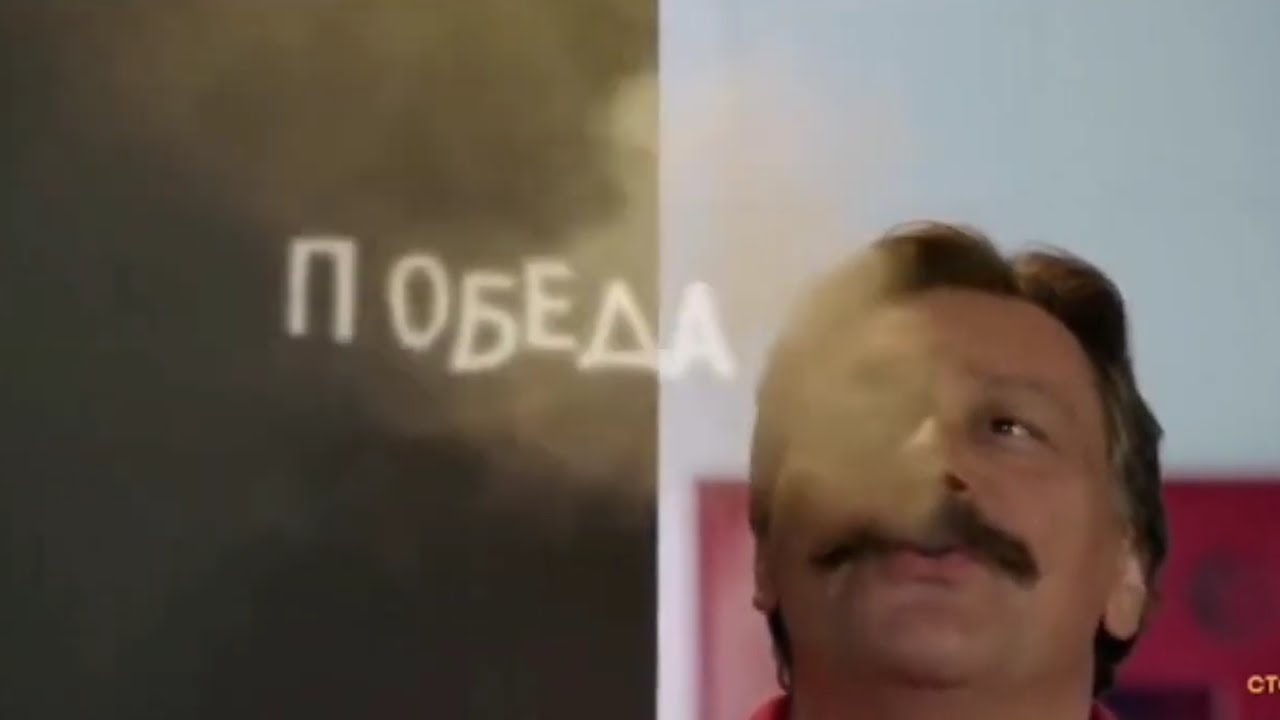

Изменилось ли качество модели? Почему?

__Ваш вывод:__

Объективно стало лучше, вот как раз благодаря конкретизации типа транзакции. Теперь мы анализируем не только количество values, но и на что эти самые values были потрачены, что помогает различать гендер, потому что женщины и мужчины тратят values в разных пропорциях на разные товары и услуги.

# Часть 3: что мы всё про данные? Давайте про модель 
# [макс 30 баллов]

Ранее мы работали только над подготовкой обучающей выборки. Давайте теперь попробуем изменить модель, чтобы добиться наилучшего качества. 

Входные данные для этой части - выборка с предыдущей.

## Нормирование данных [5 баллов] 

Как мы знаем, линейные модели любят нормированные данные.

Приведите значения всех признаков в отрезок [0, 1]

__Замечание__: если вы используете метод, который удаляет информацию о названиях колонок - сохраните эти названия в отдельную переменную, вам это потом может понадобиться.

In [28]:
# Воспользуемся Normalizer
from sklearn.preprocessing import Normalizer
norm = Normalizer()

num_data = X_train_pivot.select_dtypes([np.number])
cols = num_data.columns

X_train_pivot_norm = norm.fit_transform(X_train_pivot[cols])
X_train_pivot_norm = pd.DataFrame(X_train_pivot_norm, columns = cols)

X_test_pivot_norm = norm.fit_transform(X_test_pivot[cols])
X_test_pivot_norm = pd.DataFrame(X_test_pivot_norm, columns = cols)

In [29]:
X_train_pivot_norm

,"Авиалинии, авиакомпании","Авиалинии, авиакомпании, нигде более не классифицированные",Автобусные линии,Автозапчасти и аксессуары,Автоматизированные бензозаправки,Автомойки,Автошины,"Агентства по автотранспортным перевозкам, местные/дальные автогрузоперевозки, компании попереезду и хранению, местная доставка",Агентства по аренде автомобилей,Агенты и менеджеры по аренде недвижимости,...,"Фотостудии, фотолаборатории","Химикалии и смежные вещества, не классифицированные ранее",Химчистки,Ценные бумаги: брокеры/дилеры,Центры здоровья,"Цифровые товары, игры",Школы — бизнес и секретарей,Штрафы,"Штучные товары, галантерея и другие текстильные товары",Электрические части и оборудование
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.017205,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6679,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
6680,0.0,0.0,0.0,0.033944,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
6681,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
6682,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031117,0.000000,0.0


In [30]:
# Попробуем ещё MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
MMScaler = MinMaxScaler()

X_train_pivot_scaled = MMScaler.fit_transform(X_train_pivot[cols])
X_train_pivot_scaled = pd.DataFrame(X_train_pivot_scaled, columns = cols)

X_test_pivot_scaled = MMScaler.fit_transform(X_test_pivot[cols])
X_test_pivot_scaled = pd.DataFrame(X_test_pivot_scaled, columns = cols)

In [31]:
X_train_pivot_scaled

,"Авиалинии, авиакомпании","Авиалинии, авиакомпании, нигде более не классифицированные",Автобусные линии,Автозапчасти и аксессуары,Автоматизированные бензозаправки,Автомойки,Автошины,"Агентства по автотранспортным перевозкам, местные/дальные автогрузоперевозки, компании попереезду и хранению, местная доставка",Агентства по аренде автомобилей,Агенты и менеджеры по аренде недвижимости,...,"Фотостудии, фотолаборатории","Химикалии и смежные вещества, не классифицированные ранее",Химчистки,Ценные бумаги: брокеры/дилеры,Центры здоровья,"Цифровые товары, игры",Школы — бизнес и секретарей,Штрафы,"Штучные товары, галантерея и другие текстильные товары",Электрические части и оборудование
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.312245,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6679,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
6680,0.0,0.0,0.0,0.081025,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
6681,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
6682,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.088071,0.000000,0.0


In [32]:
# пробуем StandardScaler
from sklearn.preprocessing import StandardScaler
stan = StandardScaler()

X_train_pivot_stan = stan.fit_transform(X_train_pivot[cols])
X_train_pivot_stan = pd.DataFrame(X_train_pivot_stan, columns = cols)

X_test_pivot_stan = stan.fit_transform(X_test_pivot[cols])
X_test_pivot_stan = pd.DataFrame(X_test_pivot_stan, columns = cols)

In [33]:
X_train_pivot_stan

,"Авиалинии, авиакомпании","Авиалинии, авиакомпании, нигде более не классифицированные",Автобусные линии,Автозапчасти и аксессуары,Автоматизированные бензозаправки,Автомойки,Автошины,"Агентства по автотранспортным перевозкам, местные/дальные автогрузоперевозки, компании попереезду и хранению, местная доставка",Агентства по аренде автомобилей,Агенты и менеджеры по аренде недвижимости,...,"Фотостудии, фотолаборатории","Химикалии и смежные вещества, не классифицированные ранее",Химчистки,Ценные бумаги: брокеры/дилеры,Центры здоровья,"Цифровые товары, игры",Школы — бизнес и секретарей,Штрафы,"Штучные товары, галантерея и другие текстильные товары",Электрические части и оборудование
0,-0.035387,-0.11127,-0.055049,-0.242101,-0.05605,-0.11296,-0.063085,-0.026092,0.0,-0.018878,...,-0.048344,-0.055268,-0.050182,-0.036908,-0.092903,-0.071616,-0.025126,-0.074499,-0.058600,-0.059725
1,-0.035387,-0.11127,-0.055049,-0.242101,-0.05605,-0.11296,-0.063085,-0.026092,0.0,-0.018878,...,-0.048344,-0.055268,-0.050182,-0.036908,-0.092903,-0.071616,-0.025126,-0.074499,-0.058600,-0.059725
2,-0.035387,-0.11127,-0.055049,-0.242101,-0.05605,-0.11296,-0.063085,-0.026092,0.0,-0.018878,...,-0.048344,-0.055268,-0.050182,-0.036908,-0.092903,-0.071616,-0.025126,-0.074499,-0.058600,-0.059725
3,-0.035387,-0.11127,-0.055049,-0.242101,-0.05605,-0.11296,-0.063085,-0.026092,0.0,-0.018878,...,-0.048344,-0.055268,-0.050182,-0.036908,-0.092903,-0.071616,-0.025126,-0.074499,13.284589,-0.059725
4,-0.035387,-0.11127,-0.055049,-0.242101,-0.05605,-0.11296,-0.063085,-0.026092,0.0,-0.018878,...,-0.048344,-0.055268,-0.050182,-0.036908,-0.092903,-0.071616,-0.025126,-0.074499,-0.058600,-0.059725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6679,-0.035387,-0.11127,-0.055049,-0.242101,-0.05605,-0.11296,-0.063085,-0.026092,0.0,-0.018878,...,-0.048344,-0.055268,-0.050182,-0.036908,-0.092903,-0.071616,-0.025126,-0.074499,-0.058600,-0.059725
6680,-0.035387,-0.11127,-0.055049,1.525098,-0.05605,-0.11296,-0.063085,-0.026092,0.0,-0.018878,...,-0.048344,-0.055268,-0.050182,-0.036908,-0.092903,-0.071616,-0.025126,-0.074499,-0.058600,-0.059725
6681,-0.035387,-0.11127,-0.055049,-0.242101,-0.05605,-0.11296,-0.063085,-0.026092,0.0,-0.018878,...,-0.048344,-0.055268,-0.050182,-0.036908,-0.092903,-0.071616,-0.025126,-0.074499,-0.058600,-0.059725
6682,-0.035387,-0.11127,-0.055049,-0.242101,-0.05605,-0.11296,-0.063085,-0.026092,0.0,-0.018878,...,-0.048344,-0.055268,-0.050182,-0.036908,-0.092903,-0.071616,-0.025126,3.457424,-0.058600,-0.059725


## Подбор параметров [15 баллов]

Подберите наилучшие параметры для модели линейной регрессии. Важные уточнения:

* используйте перебор по сетке
* в качестве метрики используйте ROC AUC
* для оценки параметров делайте кросс-валидацию на 4 фолдах

__Замечание__: у линейной регрессии множество доступных значений для некоторых параметров зависит от метода оптимизации (solver). Например, lbfgs-алгоритм не подерживает l1-регуляризацию.

Поэтому действуйте шагами: сначала подберите solver, а потом уже переберите доступные для него параметры.

В качестве скалера берём __Normalizer__

In [34]:
from sklearn.model_selection import GridSearchCV
#Подбираем Solver
param_grid_solver = {'solver': ['liblinear', 'saga', 'lbfgs', 'sag']}
sol_solver_1 = GridSearchCV(LogisticRegression(), param_grid_solver, cv = 4, scoring = 'roc_auc')
sol_solver_1.fit(X_train_pivot_norm, y_train_pivot)
best_solver_1 = sol_solver_1.best_params_['solver']
print("Лучший solver:", best_solver_1)

Лучший solver: liblinear


In [35]:
# подберем остальные параметры, используя solver = 'liblinear'
param_pam = {
    'C': np.logspace(-2, 4, 20),
    'penalty': ['l1', 'l2'],
}

GridS_1 = GridSearchCV (LogisticRegression(solver = 'liblinear'), param_pam, cv = 4, scoring = 'roc_auc')
GridS_1.fit(X_train_pivot_norm, y_train_pivot)

print('Лучший подбор параметров:', GridS_1.best_params_)
print('ROC AUC:', GridS_1.best_score_)

Лучший подбор параметров: {'C': 29.76351441631316, 'penalty': 'l1'}
ROC AUC: 0.8017342657401202


Теперь посмотрим, что будет если использовать __MinMaxScaler__

In [36]:
#Подбираем Solver
param_grid_solver = {'solver': ['liblinear', 'saga', 'lbfgs', 'sag']}
sol_solver_2 = GridSearchCV(LogisticRegression(), param_grid_solver, cv = 4, scoring = 'roc_auc')
sol_solver_2.fit(X_train_pivot_scaled, y_train_pivot)
best_solver_2 = sol_solver_2.best_params_['solver']
print("Лучший solver:", best_solver_2)

Лучший solver: liblinear


In [37]:
# подберем остальные параметры, используя solver = 'liblinear'
param_pam = {
    'C': np.logspace(-2, 4, 20),
    'penalty': ['l1', 'l2'],
}

GridS_2 = GridSearchCV(LogisticRegression(solver = 'liblinear'), param_pam, cv = 4, scoring = 'roc_auc')
GridS_2.fit(X_train_pivot_scaled, y_train_pivot)

print('Лучший подбор параметров:', GridS_2.best_params_)
print('ROC AUC:', GridS_2.best_score_)

Лучший подбор параметров: {'C': 1.623776739188721, 'penalty': 'l1'}
ROC AUC: 0.7984479809731198


Ну и попробуем __StandartScaler__

In [38]:
#Подбираем Solver
param_grid_solver = {'solver': ['liblinear', 'saga', 'lbfgs', 'sag']}
sol_solver_3 = GridSearchCV(LogisticRegression(), param_grid_solver, cv = 4, scoring = 'roc_auc')
sol_solver_3.fit(X_train_pivot_stan, y_train_pivot)
best_solver_3 = sol_solver_3.best_params_['solver']
print("Лучший solver:", best_solver_3)

Лучший solver: saga


In [39]:
# подберем остальные параметры, используя solver = 'liblinear'
param_pam = {
    'C': (-2, 4, 20),
    'penalty': ['l1', 'l2'],
}

GridS_3 = GridSearchCV(LogisticRegression(solver = 'saga'), param_pam, cv = 4, scoring = 'roc_auc')
GridS_3.fit(X_train_pivot_scaled, y_train_pivot)

print('Лучший подбор параметров:', GridS_3.best_params_)
print('ROC AUC:', GridS_3.best_score_)

Лучший подбор параметров: {'C': 4, 'penalty': 'l1'}
ROC AUC: 0.7962770765889666


Оцените качество лучшей модели на тестовых данных аналогично предыдущим задачам.
Проанализировав ROC AUC, будем использовать __Normalizer__

In [40]:
# Объявили модель
model_log_regression_norm = LogisticRegression(penalty = 'l1', C = 29.76, solver = 'liblinear')

# Обучили модель на тренировочной выборке 
model_log_regression_norm.fit(X_train_pivot_norm, y_train_pivot)

# Сделали прогнозы на тестовой выборке 
y_pred_pivot_norm = model_log_regression_norm.predict(X_test_pivot_norm)
y_pred_regr_pivot_norm = model_log_regression_norm.predict_proba(X_test_pivot_norm)

In [41]:
# получим предсказания вероятностей первого класса
y_pred_regr_pivot_norm = y_pred_regr_pivot_norm [:, 1]

Оценим

In [42]:
# accuracy
accuracy_score(y_test_pivot, y_pred_pivot_norm)

0.7338516746411483

In [43]:
# precision & recall
t = 0.5
p_pred_pivot_norm = 1*(y_pred_regr_pivot_norm >= t) 

print('Точность:', precision_score(y_test_pivot, p_pred_pivot_norm)) # precision
print('Полнота:', recall_score(y_test_pivot, p_pred_pivot_norm)) # recall

Точность: 0.770764119601329
Полнота: 0.6018158236057068


In [44]:
# ROC_AUC
roc_auc_score(y_test_pivot, y_pred_regr_pivot_norm)

0.8198694058050502

вот скрин результатов 2 части
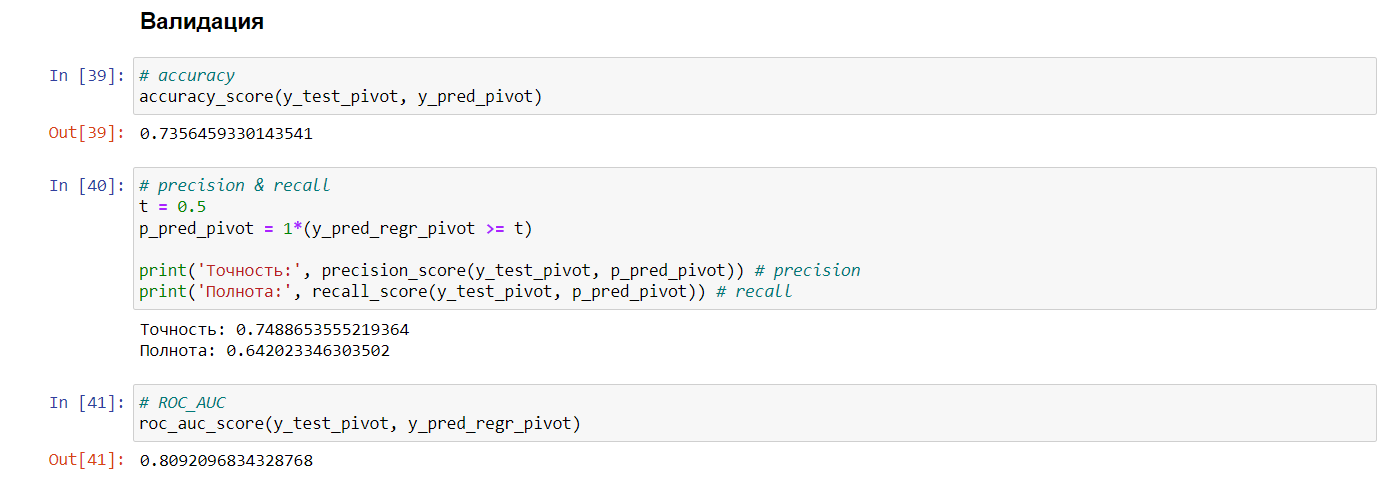

Получилось ли добиться лучше качества при подборе параметров?
Почему так? 

- Да, качество улучшилось, потому что подбор параметров происходит путем перебора различных значений каждого параметра и оценки качества работы модели при каждом значении. Таким образом, определяются те значения параметров, при которых получается максимальное качество работы модели.

Для чего мы использовали одновременно кросс-валидацию и отложенную тестовую выборку?

- Использование отложенной тестовой выборки позволяет оценить качество модели на данных, которые не были использованы в процессе обучения, что помогает выявить переобучение. Однако, данная методика все равно может не учитывать некоторые особенности независимых данных, что может привести к переобучению, поэтому также используется кросс-валидация.

__Ваш вывод__:

Ну только если подытожить, что точность и ROC AUC улучшились, благодаря использованию отложенной тестовой выборки и кросс-валидации, подбору параметров. Но качество модели все равно на +- и получится ли с этим что-то сделать, посмотрим в части 4 :)

## Подбор отсечения [5 баллов]

Ранее мы работали или с вероятностями из модели или с метками, полученных при отсечении по веростности с порогом 0.5.

Стоит сказать, что порог 0.5 для разделения классов не всегда самый лучший. Часто нам нужно так подобрать порог, чтобы удовлетворить наши требования по точности и полноте.

Давайте подберём порог, который максимизирует F_beta меру при условии, что нам полнота в 5 раз важнее точности.

Вычислите наилучший порог и нарисуйте график зависимости этой метрики от порога разделения.

Лучший порог: 0.05


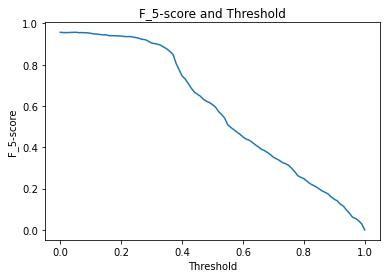

In [45]:
from sklearn.metrics import fbeta_score

thresholds = np.linspace(0, 1, 101)
beta = 5
fbeta_scores = []
# Перебор порогов
for i in thresholds:
    y_pred = (y_pred_regr_pivot_norm >= i).astype(int)
    fbeta = fbeta_score(y_test_pivot, y_pred, beta = beta)
    fbeta_scores.append(fbeta)
best_threshold = thresholds[np.argmax(fbeta_scores)]
print("Лучший порог:", best_threshold)

plt.plot(thresholds, fbeta_scores)
plt.xlabel('Threshold')
plt.ylabel(f'F_{beta}-score')
plt.title(f'F_{beta}-score and Threshold')
plt.show()

## Интерпретация модели [5 баллов]

Часто нам хочется интерпритировать предсказания модели - понять, как наши признаки влияют на её ответ.
В случае сложных моделей сделать это не просто - чем сложнее модель, тем более сложные закономерности она извлекает и тем тяжелее нам их понять.

Но в случае линейной регресии это просто сделать, посмотрев на её обучаемые параметры (вспоминайте!).

Получите список признаков, которые увеличивают вероятность метки 0.
Аналогично для метки 1.

In [46]:
# Список признаков, которые увеличивают вероятность метки 0, для их поиска счмиаем коэффициенты модели
model = model_log_regression.fit(X_train_pivot_norm, y_train_pivot)
coef = model.coef_
features_0 = []
for i in range(coef.shape[1]):
    if coef[0, i] < 0:
        features_0.append((X_train_pivot_norm.columns[i], coef[0, i]))

features_0.sort(key = lambda x: x[1], reverse=True)
features_0

[('Галереи и художественные посредники', -0.0019744600182521896),
 ('Ортопедические товары', -0.003961859773678701),
 ('Оборудование для выращивания растений, инвентарь для питомников и цветы',
  -0.004658668329891603),
 ('Круизные линии', -0.00514902410998951),
 ('Больницы', -0.005362482086895174),
 ('Химикалии и смежные вещества, не классифицированные ранее',
  -0.0059934753874722755),
 ('Агенты и менеджеры по аренде недвижимости', -0.00792646276058551),
 ('Ремонт бытовой техники, ремонт электроприборы', -0.008915624395053426),
 ('Таймшер', -0.012898019858230282),
 ('Организации, членства, нигде ранее не классифицируемые',
  -0.015305940843817804),
 ('Ветеринарные услуги', -0.015814039735349082),
 ('Химчистки', -0.01666331849464253),
 ('Нефть и нефтепродукты', -0.01686746102847776),
 ('Судовые выплаты, включая алименты и детскую поддержку',
  -0.01708052247788745),
 ('Производство и дистрибуция видеофильмов', -0.020188071276633756),
 ('Стоматологическое/лабороторное/медицинское/офтал

In [47]:
# Список признаков, которые увеличивают вероятность метки 1, для их поиска счмиаем коэффициенты модели
features_1 = []
for i in range(coef.shape[1]):
    if coef[0, i] > 0:
        features_1.append((X_train_pivot_norm.columns[i], coef[0, i]))

features_1.sort(key = lambda x: x[1], reverse=True)
features_1

[('Станции техобслуживания', 5.615099794804063),
 ('Автозапчасти и аксессуары', 5.1956055493050135),
 ('Лесо- и строительный материал', 3.9911704582896435),
 ('Галереи/учреждения видеоигр', 3.6265980990875044),
 ('Горючее топливо — уголь, нефть, разжиженный бензин, дрова',
  2.802849469317888),
 ('Транзакции по азартным играм', 2.352419153447366),
 ('Продажа электронного оборудования', 2.319309194455442),
 ('Садовые принадлежности (в том числе для ухода за газонами) в розницу',
  2.006744448547005),
 ('Компьютерная сеть/информационные услуги', 2.00237686640836),
 ('Не-финансовые институты — иностранная валюта, денежные переводы (непередаваемые), дорожные чеки, квази-кэш',
  1.7446010652577386),
 ('Кинотеатры', 1.6618085031367285),
 ('Магазины с продажей спиртных напитков на вынос (пиво, вино и ликер)',
  1.5996614855118854),
 ('Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков',
  1.5451390353463168),
 ('Телекоммуникационное оборудование, включ

# Часть 4: ва-банк / пространство для творчества [макс 30 баллов]

Добейтесь максимального качества, больше качество - больше баллов.

Стратегия подготовки данных и обучения модели на ваше усмотрение.

Условия:
* Оценка на отложенной тестовой группе пользователей, использовавшейся в прошлых пунктах (20%)
* В качестве метрики используйте ROC_AUC

__Замечание__: 

Ответа на вопрос "какое нужно качество для максимального балла?" не будет.

Используйте все свои знания, чтобы добиться наилучшего результата.

In [48]:
# Попробуем использовать случайный лес, который в семинаре 9 "довольно мощно отрабатывает"
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators = 1000, random_state = 32)
model_rf.fit(X_train_pivot_norm, y_train_pivot)

p_pred_rf = model_rf.predict_proba(X_test_pivot_norm)
roc_auc_score(y_test_pivot, p_pred_rf[:, -1])

0.8341423493999318

In [49]:
print('улучшение качества в 3 части на:',
      roc_auc_score(y_test_pivot, p_pred_rf [:, -1]) - roc_auc_score(y_test_pivot, y_pred_regr_pivot_norm))

улучшение качества в 3 части на: 0.014272943594881626


Да, это конечно не много, но зато это честная работа... и я больше не знаю, что придумать... пойду отдохну

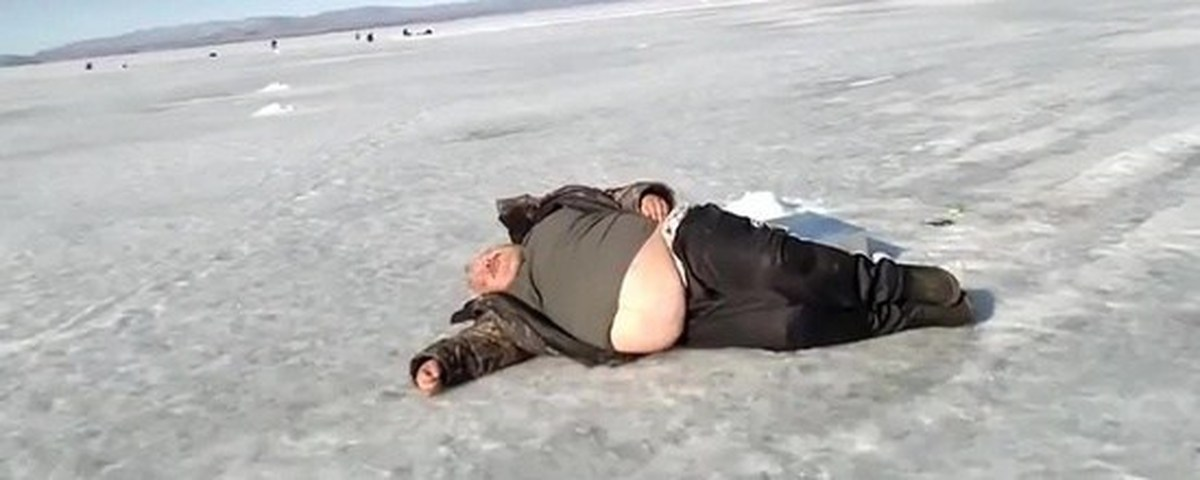